<a href="https://colab.research.google.com/github/JapeTheEternalChild/LSTM-Streamflowprediction-with-Keras/blob/main/Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title
from pydrive.drive import GoogleDrive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import glob
import os
import sys
import scipy.stats as sp
from google.colab import drive
import statistics
drive.mount('/content/drive')

Mounted at /content/drive


# Validation Metrics

## Data prep


### converting NSE strings to integers

In [ ]:
#Get int NSE


RNN = 'LSTM'
Experiment = '3'
HUC = ['01', '03', '11', '17']
HUC_names = ['New England', 'South Atlantic-gulf', 'Arkansas-White-Red', 'Pacific Northwest']
df_complete = []

for i in range(len(HUC)):
  os.chdir('/content/drive/My Drive/Colab Notebooks/Experiment'+Experiment+'/'+RNN+'/loss_MSE/results')
  df = pd.read_csv(HUC[i]+RNN+'_results.csv', index_col=None)



  df['nse_val'] = df['nse_val'].str[1:-1].astype('float')
  nse_val = df['nse_val']
  df['nse_train'] = df['nse_train'].str[1:-1].astype('float')
  nse_train = df['nse_train']
  #hucname = HUC_names[i]
  #hucid = HUC[i]
  #hucname = [HUC_names[i] for z in range(len(nse_train))]
  #hucname = pd.Series( (v[] for v in hucname) )
  #hucid = [HUC[i] for z in range(len(nse_train))]
  #hucid = pd.Series( (v[] for v in hucid) )
  #df = pd.concat([df,hucname, hucid], axis=1)                                                                     
  df['HUC_name'] = HUC_names[i]
  df['HUC_ID'] = HUC[i]
  df.to_csv(Experiment+ '_' +RNN+ '_' +HUC[i]+'_results_num.csv', index=False)

df

,Unnamed: 0,catchment_ID,nse_train,nse_val,HUC_name,HUC_ID
0,0,12073500,0.672633,0.572582,Pacific Northwest,17
1,1,14185000,0.860865,0.764680,Pacific Northwest,17
2,2,13340600,0.953430,0.820300,Pacific Northwest,17
3,3,13338500,0.945197,0.776794,Pacific Northwest,17
4,4,14222500,0.805222,0.768347,Pacific Northwest,17
...,...,...,...,...,...,...
86,86,12043000,0.670211,0.418161,Pacific Northwest,17
87,87,12451000,0.889542,0.775879,Pacific Northwest,17
88,88,12145500,0.730104,0.678591,Pacific Northwest,17
89,89,14158790,0.861729,0.675306,Pacific Northwest,17


### sumarizing metrics for all catchments

In [ ]:

RNN = 'LSTM'
Experiment = '3'

HUC = ['01', '03', '11', '17']
df_complete = []
for i in range(len(HUC)):
  os.chdir('/content/drive/My Drive/Colab Notebooks/Experiment'+Experiment+'/'+RNN+'/loss_MSE/results')
  df = pd.read_csv(Experiment+'_'+RNN+'_'+HUC[i]+'_results_num.csv')
  df_complete.append(df)

df_results = pd.concat(df_complete, axis=0)
df_results
cols = [0]
df_results.drop(df_results.columns[cols], axis=1, inplace=True)
df_results['catchment_ID'] = '0'+df_results['catchment_ID'].astype(str)
#df_results.set_index('catchment_ID')

os.chdir('/content/drive/My Drive/Colab Notebooks/Experiment'+Experiment+'/results_new')
df_results.to_csv('Experiment_'+Experiment+'_'+RNN+'_results_complete.csv', index=False)

## Comparing to SAC-SMA + Snow17




In [ ]:
#@title
Experiment = '3'


# Directory
os.chdir('/content/drive/My Drive/Colab Notebooks/Experiment'+Experiment)

df_LSTM = pd.read_csv('results_old'+'/''Experiment_'+Experiment+'_LSTM_results_complete.csv', index_col='catchment_ID')
df_GRU = pd.read_csv('results_old'+'/''Experiment_'+Experiment+'_GRU_results_complete.csv', index_col='catchment_ID')


#Directory
os.chdir('/content/drive/My Drive/Colab Notebooks/Evaluation/Kratzert results')

#daymet nse
df_kratzert = pd.read_table('basin_nse_daymet.txt', index_col=0)
df_kratzert = df_kratzert.loc[df_LSTM.index, :]
df_kratzert


# Difference
dif = pd.DataFrame(df_kratzert['Val']-df_LSTM['nse_val'])
dif_g = pd.DataFrame(df_kratzert['Val']-df_GRU['nse_val'])
#df_kratzert.loc[df_LSTM.index, 2464360]


In [ ]:
sub = df_LSTM.where(df_LSTM['nse_val'] < 0.7)
sub.count()

45/241

0.18672199170124482

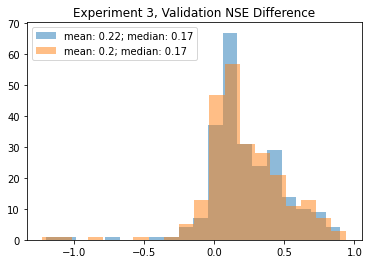

In [ ]:
#@title
### DIFFERENCES EXPERIMENT 3 KRATZERT-STUDYPORJECT

dif_mean = round(dif.iloc[0].mean(), 2)
dif_median = round(statistics.median(dif[0]),2)

dif_mean_g = round(dif_g.iloc[0].mean(), 2)
dif_median_g = round(statistics.median(dif_g[0]),2)

plt.hist(dif[0], 20, alpha=0.5)
plt.hist(dif_g[0], 20, alpha=0.5)
plt.legend(['mean: '+str(dif_mean)+'; median: '+str(dif_median),'mean: '+str(dif_mean_g)+'; median: '+str(dif_median_g)] )
plt.title('Experiment 3, Validation NSE Difference')

os.chdir('/content/drive/My Drive/Colab Notebooks/Evaluation/figure')
plt.savefig('Experiment'+Experiment+'_validation_nse_diff.png')

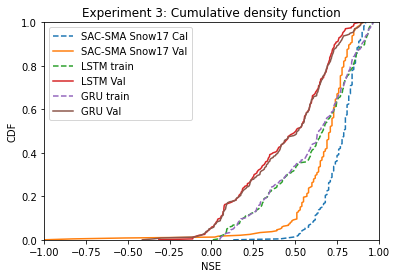

In [ ]:
#@title
### Cumulative Distribution Curve ###

### NSE
#sort data
LSTM_train_nse_sorted = np.sort(df_LSTM['nse_train']) 
LSTM_test_nse_sorted = np.sort(df_LSTM['nse_val'])
GRU_train_nse_sorted = np.sort(df_GRU['nse_train']) 
GRU_test_nse_sorted = np.sort(df_GRU['nse_val'])
kratzert_train_nse_sorted = np.sort(df_kratzert['Cal']) 
kratzert_test_nse_sorted = np.sort(df_kratzert['Val'])

# calculate proportional values of samples
p_L_train= 1. * np.arange(len(LSTM_train_nse_sorted)) / (len(LSTM_train_nse_sorted) - 1)
p_L_test= 1. * np.arange(len(LSTM_test_nse_sorted)) / (len(LSTM_test_nse_sorted) - 1)
p_G_train= 1. * np.arange(len(GRU_train_nse_sorted)) / (len(GRU_train_nse_sorted) - 1)
p_G_test= 1. * np.arange(len(GRU_test_nse_sorted)) / (len(GRU_test_nse_sorted) - 1)
p_M_train= 1. * np.arange(len(kratzert_train_nse_sorted)) / (len(kratzert_train_nse_sorted) - 1)
p_M_test= 1. * np.arange(len(kratzert_test_nse_sorted)) / (len(kratzert_test_nse_sorted) - 1)

# plot sorted data

plt.plot(kratzert_train_nse_sorted, p_M_train, '--', kratzert_test_nse_sorted, p_M_test, LSTM_train_nse_sorted, p_L_train, '--', LSTM_test_nse_sorted, p_L_test, GRU_train_nse_sorted, p_G_train, '--',GRU_test_nse_sorted,  p_G_test  )
plt.ylim(0, 1)
plt.xlim(-1, 1)
plt.legend(['SAC-SMA Snow17 Cal', 'SAC-SMA Snow17 Val', 'LSTM train', 'LSTM Val', 'GRU train', 'GRU Val'])
plt.xlabel('NSE')
plt.ylabel('CDF')
plt.title('Experiment '+Experiment+': Cumulative density function')

os.chdir('/content/drive/My Drive/Colab Notebooks/Evaluation/figure')

plt.savefig('CDF_Experiment_'+Experiment+'.png', bbox_inches='tight')

## PLOTS

In [ ]:
#@title
### HISTOGRAMS NSE 

Experiment = '3'

# Directory
os.chdir('/content/drive/My Drive/Colab Notebooks/Experiment'+Experiment)

df_LSTM = pd.read_csv('results_old'+'/''Experiment_'+Experiment+'_LSTM_results_complete.csv', index_col='catchment_ID')
df_GRU = pd.read_csv('results_old'+'/''Experiment_'+Experiment+'_GRU_results_complete.csv', index_col='catchment_ID')


#Directory
os.chdir('/content/drive/My Drive/Colab Notebooks/Evaluation/Kratzert results')

#daymet nse
df_kratzert = pd.read_table('basin_nse_daymet.txt', index_col=0)
df_kratzert = df_kratzert.loc[df_LSTM.index, :]

LSTM_mean_val = df_LSTM['nse_val'].mean()
LSTM_mean_val = round(LSTM_mean_val, 2)
LSTM_median_val = round(statistics.median(df_LSTM['nse_val']), 2)
GRU_mean_val = df_GRU['nse_val'].mean()
GRU_mean_val = round(GRU_mean_val, 2)
GRU_median_val = round(statistics.median(df_GRU['nse_val']), 2)
df_kratzert_mean = df_kratzert['Val'].mean()
df_kratzert_mean = round(df_kratzert_mean, 2)
kratzert_median_val = round(statistics.median(df_kratzert['Val']), 2)


plt.hist(df_LSTM['nse_val'], 100, alpha=0.5, label='x')
plt.hist(df_GRU['nse_val'],100, alpha=0.5, label='y')
plt.hist(df_kratzert['Val'], 100, alpha=0.5, label='z')
#plt.legend(['LSTM, mean:'+str(LSTM_mean_val), 'GRU, mean:'+str(GRU_mean_val), '; median:'+str(GRU_median_val), 'kratzert LSTM, mean:'+str(df_kratzert_mean)+'; median:'+str(kratzert_median_val)])
plt.legend(['LSTM, mean:'+str(LSTM_mean_val)+'; median:'+str(LSTM_median_val), 'GRU, mean:'+str(GRU_mean_val)+'; median:'+str(GRU_median_val), 'SAC-SMA+Snow17 Val, mean:'+str(df_kratzert_mean)+'; median:'+str(kratzert_median_val) ])
plt.title('Experiment '+Experiment+' Validation NSE', fontsize='15')
plt.xlabel('NSE')

os.chdir('/content/drive/My Drive/Colab Notebooks/Evaluation/figure/')
plt.savefig('Experiment'+Experiment+'_validation_nse_hist.png')

plt.show()

NameError: ignored

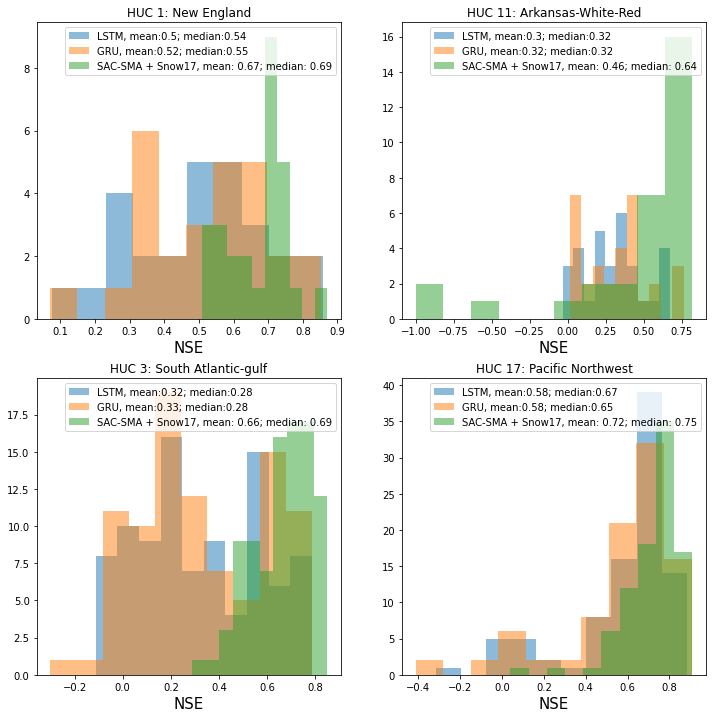

In [ ]:
#@title
### HISTOGRAMS HUC wise

HUC = [1, 3, 11, 17]

fig, ax = plt.subplots(2,2, figsize=(12, 12))
counter_hor = 0
counter_ver = 0
for x in HUC:
  #seperate HUC
  df_L = df_LSTM.loc[df_LSTM['HUC_ID'] == x]
  df_G = df_GRU.loc[df_GRU['HUC_ID'] == x]
  LSTM_mean_val = df_L['nse_val'].mean()
  LSTM_mean_val = round(LSTM_mean_val, 2)
  LSTM_median_val = round(statistics.median(df_L['nse_val']), 2)
  GRU_mean_val = df_G['nse_val'].mean()
  GRU_mean_val = round(GRU_mean_val, 2)
  GRU_median_val = round(statistics.median(df_G['nse_val']), 2)

  #SAC-SMA
  m = df_kratzert.loc[df_L.index]
  m = m['Val']
  m_mean = round(m.mean(), 2)
  m_median = round(statistics.median(m), 2)

  huc_name = df_L['HUC_name'].iloc[0]  
  
  #plot
  ax[counter_hor, counter_ver].hist(df_L['nse_val'], 10, alpha=0.5, label='x')
  ax[counter_hor, counter_ver].hist(df_G['nse_val'],10, alpha=0.5, label='y')
  ax[counter_hor, counter_ver].hist(m ,10, alpha=0.5, label='z')
  #plt.hist(df_kratzert['Val'], 100, alpha=0.5, label='z')
#plt.legend(['LSTM, mean:'+str(LSTM_mean_val), 'GRU, mean:'+str(GRU_mean_val), '; median:'+str(GRU_median_val), 'kratzert LSTM, mean:'+str(df_kratzert_mean)])
  ax[counter_hor, counter_ver].legend(['LSTM, mean:'+str(LSTM_mean_val)+'; median:'+str(LSTM_median_val), 'GRU, mean:'+str(GRU_mean_val)+'; median:'+str(GRU_median_val), 'SAC-SMA + Snow17, mean: '+str(m_mean)+'; median: '+str(m_median) ])
  ax[counter_hor, counter_ver].set_title('HUC '+str(x)+ ': '+huc_name)
  ax[counter_hor, counter_ver].set_xlabel('NSE', fontsize='15')

  counter_hor = counter_hor+1
  if counter_hor == 2:
    counter_ver = counter_ver+1
    counter_hor = 0

#fig,suptitle('Experiment'+Experiment+', Validation NSE')
plt.savefig('Experiment'+Experiment+'_validation_nse_hist_huc.png')

In [ ]:
Experiment = ''

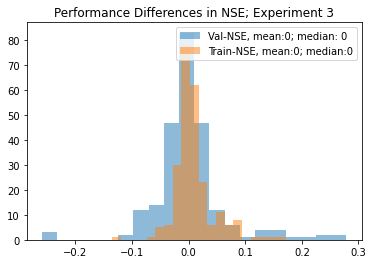

In [ ]:
#@title
### DIFFERENCES between different runs ###

Experiment = '3'


# Directory
os.chdir('/content/drive/My Drive/Colab Notebooks/Experiment'+Experiment)

df_LSTM_old = pd.read_csv('results_old'+'/''Experiment_'+Experiment+'_LSTM_results_complete.csv', index_col='catchment_ID')
df_LSTM_new = pd.read_csv('results_new'+'/''Experiment_'+Experiment+'_LSTM_results_complete.csv', index_col='catchment_ID')
df_LSTM_new = df_LSTM_new.iloc[:, 0:2]
df_LSTM_old = df_LSTM_old.iloc[:, 0:2]
# Differences

df_dif = df_LSTM_old-df_LSTM_new
df_dif_mean_train = round(df_dif['nse_train'].mean())
df_dif_mean_val = round(df_dif['nse_val'].mean())
df_dif_median_train = round(statistics.median(df_dif['nse_train']))
df_dif_median_val = round(statistics.median(df_dif['nse_val']))

plt.hist(df_dif['nse_val'], 20, alpha=0.5, label='x')
plt.hist(df_dif['nse_train'], 20, alpha=0.5, label='y')
plt.legend(['Val-NSE, mean:'+str(df_dif_mean_val)+'; median: '+str(df_dif_median_val), 'Train-NSE, mean:'+str(df_dif_mean_train)+'; median:'+str(df_dif_median_train)])
plt.title('LSTM Performance Differences in NSE; Experiment '+Experiment)
os.chdir('/content/drive/My Drive/Colab Notebooks/Evaluation/figure/')
plt.savefig('Experiment'+Experiment+'_performance_dif.png')

Text(0.5, 1.0, 'Performance difference LSTM-GRU')

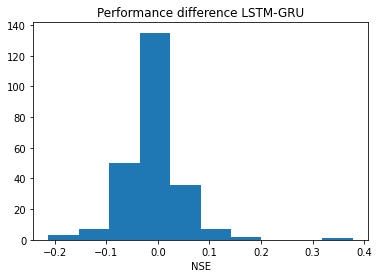

In [ ]:
#@title
### Difference GRU to LSTM

dif_GL = df_LSTM['nse_val']-df_GRU['nse_val']

plt.hist(dif_GL, 10)
plt.xlabel('NSE')
plt.title('Performance difference LSTM-GRU')

In [ ]:
Experiment = ''
catchment_ID = ''

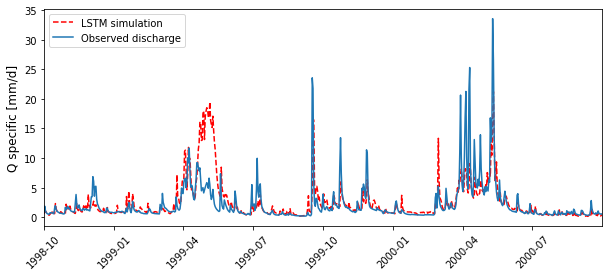

In [ ]:
#@title
#### HYDROGRAPHS #####

import datetime

RNN = 'LSTM'
Experiment = '3'
catchment_ID = '01052500'

# get TEST data & results LSTM
os.chdir('/content/drive/My Drive/Colab Notebooks/Experiment'+Experiment+'/'+RNN+'/loss_MSE/model_predictions')
test_data = pd.read_csv(catchment_ID+'_test_pred.csv')
test_data['Datetime'] =  pd.to_datetime(test_data['Datetime'], format='%Y %m %d')  # set Datetime format
test_data = test_data.set_index(pd.DatetimeIndex(test_data['Datetime']))

# get TRAIN data and results
train_data = pd.read_csv(catchment_ID+'_train_pred.csv')
train_data['Datetime'] =  pd.to_datetime(train_data['Datetime'], format='%Y %m %d')  # set Datetime format
train_data = train_data.set_index(pd.DatetimeIndex(train_data['Datetime']))

# define time window for plot
start = '19981001'
end = '20000930'
test_data_interval = test_data[start: end]
#data['Datetime'] =  pd.to_datetime(data['Datetime'], format='%Y %m %d %H')  # set Datetime format
#data['Datetime'] = pd.to_datetime(data['Datetime']).dt.date # drop hours

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(test_data_interval.index, test_data_interval['predictions'], 'r--', test_data_interval.index, test_data_interval['Q_spec(mm)'])
ax.xaxis.set_tick_params(rotation=45)
ax.set_ylabel('Q specific [mm/d]', fontsize='12')
ax.set_xlim(datetime.date(1998, 10, 1), datetime.date(2000, 9, 30))
plt.legend(['LSTM simulation', 'Observed discharge'])

os.chdir('/content/drive/My Drive/Colab Notebooks/Evaluation/figure/')
plt.savefig('Experiment'+Experiment+'_'+catchment_ID+'hydrograph.png', bbox_inches = 'tight')

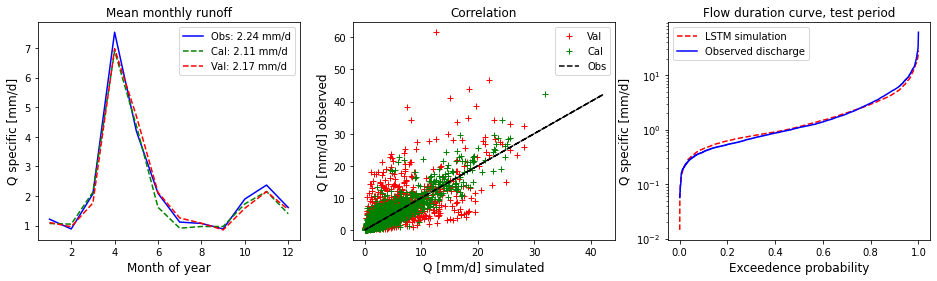

In [ ]:
#@title
##### mean monthly runoff https://doi.org/10.1080/02626667.2019.1657233

mean_val = test_data.groupby(test_data.index.month).mean()
m_v = test_data['predictions'].mean()
mean_cal = train_data.groupby(train_data.index.month).mean()
m_c = train_data['predictions'].mean()
mean_obs = (mean_val+mean_cal)/2
m_o = (test_data['Q_spec(mm)'].mean()+train_data['Q_spec(mm)'].mean())/2

fig1, ax1 = plt.subplots(1, 3, figsize=(16, 4))
ax1[0].plot(mean_obs.index, mean_obs['Q_spec(mm)'], 'b', label='Obs: '+str(round(m_o, 2))+' mm/d')
ax1[0].plot(mean_cal.index, mean_cal['predictions'], 'g--', label='Cal: '+str(round(m_c, 2))+' mm/d')
ax1[0].plot(mean_val.index, mean_val['predictions'], 'r--',  label='Val: '+str(round(m_v, 2))+' mm/d')
ax1[0].legend();
ax1[0].set_ylabel('Q specific [mm/d]', fontsize='12')
ax1[0].set_xlabel('Month of year', fontsize='12')
ax1[0].title.set_text('Mean monthly runoff')
#plt.plot(mean_obs.index, mean_obs['Q_spec(mm)'], 'b', mean_cal.index, mean_cal['predictions'], 'g--', mean_val.index, mean_val['predictions'], 'r--')

### comparing obs and sim

ax1[1].plot(test_data['predictions'], test_data['Q_spec(mm)'], 'r+', label='Val')
ax1[1].plot(train_data['predictions'], train_data['Q_spec(mm)'], 'g+', label='Cal' )
ax1[1].plot(train_data['Q_spec(mm)'], train_data['Q_spec(mm)'], 'k--', label='Obs')
ax1[1].legend()
ax1[1].set_ylabel('Q [mm/d] observed', fontsize='12')
ax1[1].set_xlabel('Q [mm/d] simulated', fontsize='12')
ax1[1].title.set_text('Correlation')
### flow duration curves

# train
test_pred_sort = np.sort(test_data['predictions'])
test_obs_sort = np.sort(test_data['Q_spec(mm)'])

p_pred= 1. * np.arange(len(test_pred_sort)) / (len(test_pred_sort) - 1)
p_obs= 1. * np.arange(len(test_obs_sort)) / (len(test_obs_sort) - 1)
ax1[2].plot(p_pred,test_pred_sort,'r--',  p_obs , test_obs_sort, 'b-')
ax1[2].set_yscale('log')
ax1[2].set_ylabel('Q specific [mm/d]', fontsize='12')
ax1[2].set_xlabel('Exceedence probability', fontsize='12')
ax1[2].title.set_text('Flow duration curve, test period')
plt.legend(['LSTM simulation', 'Observed discharge'])

os.chdir('/content/drive/My Drive/Colab Notebooks/Evaluation/figure/')
plt.savefig('Experiment'+Experiment+'_'+catchment_ID+'flowtriple.png')

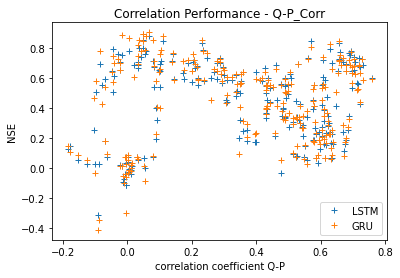

In [ ]:
#@title
### Performance correlation - p-Q correlation



#define current directory
os.chdir('/content/drive/My Drive/Colab Notebooks/Evaluation')
#save dataframe with results
p_Q_cor = pd.read_csv('Q_p_correlation.csv', index_col='catchment_ID')

plt.plot(p_Q_cor['correlation coefficient (dicharge-precip)'], df_LSTM['nse_val'], '+', p_Q_cor['correlation coefficient (dicharge-precip)'], df_GRU['nse_val'], '+')
plt.ylabel('NSE')
plt.xlabel('correlation coefficient Q-P')
plt.legend(['LSTM', 'GRU'])
plt.title('Correlation Performance - Q-P_Corr')
os.chdir('/content/drive/My Drive/Colab Notebooks/Evaluation/figure')
plt.savefig('Performance_correlation'+Experiment+'.png', bbox_inches='tight')

# Forcing data evaluation 


## functions


In [ ]:


def read_data(filename_daymet, filename_flow):
  # daily metereo mean data 
  daymet = pd.read_csv(filename_daymet, sep='\t', header=4)
  daymet.columns =['Datetime', 'dayl(s)', 'prcp(mm/d)', 'srad(W/m2)', 'swe(mm)', 'tmax(c)', 'tmin(C)', 'vp(Pa)']  # name columns
  # get catchment area
  with open(filename_daymet, 'r') as fp:
      content = fp.readlines()
      area = int(content[2])
  # daily streamflow data
  flow = pd.read_csv(filename_flow, header=None, delim_whitespace=True)
  flow = flow[4] # select column
  flow = flow[1:] # drop first line 1.1.1980 because daymet starts from the 2.1.1980
  flow.reset_index(drop=True, inplace=True) # reset index
  flow = 28316846.592 * flow * 86400 / (area * 10 ** 6) # from cubic feet per second to equivalent water column in mm
  # combine daymet and streamflow
  data = pd.concat([daymet, flow], axis=1)
  data['Datetime'] =  pd.to_datetime(data['Datetime'], format='%Y %m %d %H')  # set Datetime format
  data['Datetime'] = pd.to_datetime(data['Datetime']).dt.date # drop hours
  data = data.set_index(pd.DatetimeIndex(data['Datetime']))
  data = data.drop(['swe(mm)'], axis=1)
  data = data.drop(['Datetime'], axis=1)
  data = data.drop(['dayl(s)'], axis=1)
  data_old = data.shape[0]
  # delete missing data
  data.columns =['prcp(mm/d)', 'srad(W/m2)', 'tmax(c)', 'tmin(C)', 'vp(Pa)', 'Q_spec(mm)']  # name columns
  idxNegatives = data[data['Q_spec(mm)'] < 0].index 
  data.drop(idxNegatives, inplace = True)
  data.dropna(inplace = True)
  # Print how many samples where deleted
  deleted = data_old-data.shape[0]
  print( deleted, 'SAMPLES WHERE DELETED DUE TO MISSING DATA')

  return data

def split_data1(data):
  df_train = data['1980-10-01':'1995-09-30']
  df_test = data['1995-10-01':'2010-09-30']
  return df_train, df_test



## rainfall runoff correlation

In [ ]:
#### Calcualtion correlation coefficient
## rainfall-discharge

HUC_IDs = ['01', '03', '11', '17']
# Create List with all filenames (all catchments in HUC)
catchments_daymet = []
catchments_flow = []

for i in range(len(HUC_IDs)):

  HUC_ID = HUC_IDs[i]
  # Define path for daymet
  start_path_daymet = '/content/drive/My Drive/Colab Notebooks/basin_mean_forcing/daymet'
  final_path_daymet = os.path.join(start_path_daymet, HUC_ID, '*.txt')
  #define path for streamflow
  start_path_flow = '/content/drive/My Drive/Colab Notebooks/usgs_streamflow'
  final_path_flow = os.path.join(start_path_flow, HUC_ID, '*.txt')
  for file in glob.glob(final_path_daymet):
    catchments_daymet.append(file)
  for file in glob.glob(final_path_flow):
    catchments_flow.append(file)

# Create empty list to store correlationcoefficiencts in
df_result = []

for i in range(len(catchments_daymet)):
  # get path
  filename_daymet = catchments_daymet[i]
  # get catchmennt ID
  catchment_ID = os.path.basename(filename_daymet).split('_', 1)[0]
  #get path
  filename_flow = [s for s in catchments_flow if catchment_ID in s]
  data = read_data(filename_daymet, filename_flow[0])
  data = data['1980-10-01':'2010-09-30']
  coef = np.corrcoef(data['Q_spec(mm)'].to_numpy(), data['prcp(mm/d)'].to_numpy())
  coef = coef[1, 0]
  df_result.append([catchment_ID, coef])

#initialize dataframe
df_result = pd.DataFrame(df_result, columns=['catchment_ID', 'correlation coefficient (dicharge-precip)'])
df_result.set_index('catchment_ID', inplace=True)
#define current directory
os.chdir('/content/drive/My Drive/Colab Notebooks/Evaluation')
#save dataframe with results
df_result.to_csv('Q_p_correlation.csv')

In [ ]:
catchment_ID='2081500'

#Directory
os.chdir('/content/drive/My Drive/Colab Notebooks/Evaluation')
#load correlation df
df_cor = pd.read_csv('Q_p_correlation.csv')



df_cor.set_index('catchment_ID', inplace=True, drop=True)
df_cor.loc[[catchment_ID]]
#df_cor

## visualisation (needs to be revised)

In [ ]:
# Check data for catchmnent with bad metrics

catchment_ID = '02350900'
HUC ='03'

filename_daymet = '/content/drive/My Drive/Colab Notebooks/basin_mean_forcing/daymet/'+HUC+'/'+catchment_ID+'_lump_cida_forcing_leap.txt'
filename__flow = '/content/drive/My Drive/Colab Notebooks/usgs_streamflow/'+HUC+'/'+catchment_ID+'_streamflow_qc.txt'

data=read_data(filename_daymet, filename__flow)
df_train, df_test = split_data1(data)

df_train

In [ ]:
df_temp = df_train[['tmax(c)', 'tmin(C)']]

fig, axes = plt.subplots(2, 3, figsize=(40, 20))

sns.lineplot(ax=axes[0, 0], x=df_train.index, y=df_train['Q_spec(mm)'])
sns.lineplot(ax=axes[0, 1], x=df_train.index, y=df_train['prcp(mm/d)'])
sns.lineplot(ax=axes[0, 2], data= df_temp)
sns.lineplot(ax=axes[1, 0], x=df_train.index, y=df_train['srad(W/m2)'])
sns.lineplot(ax=axes[1, 1], x=df_train.index, y=df_train['vp(Pa)'])



# SINGLE MODEL RUN